In [2]:
%%bq query
#standardSQL
CREATE OR REPLACE MODEL `bergqvist-sandbox.bike_demo.lr_low`
OPTIONS
  (model_type='logistic_reg',
    l2_reg=0.2,
    l1_reg=0.8) AS
SELECT
  CAST(dow AS string) AS dow,
  CAST(month AS string) AS month,
  CAST(quarter AS string) AS quarter,
  CAST(hour AS string) AS hour,
  (temp_f - 32)*5/8 AS temp_c,
  wind_speed,
  max_speed,
  IF(wind_gust=999.9, 0, wind_gust) AS wind_gust,
  IF(prepcip=99.99, 0, prepcip) AS prepcip,
  prep_type,
  IF(snow_dep=999.9, 0, snow_dep) AS snow_dep, 
  CAST(bikesAvailable / (spacesAvailable + bikesAvailable) > 0.25 AS int64) AS label
FROM
  `bergqvist-sandbox.bike_demo.bike_final`
WHERE
  `rand` < 0.3
;

QueryResultsTable job_J1tjaTA84Q97a4pCYJ00KqVkAfmE

In [3]:
%%bq query
#standardsql
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bergqvist-sandbox.bike_demo.lr_low`, (
SELECT 
  CAST(dow AS string) AS dow,
  CAST(month AS string) AS month,
  CAST(quarter AS string) AS quarter,
  CAST(hour AS string) AS hour,
  (temp_f - 32)*5/8 AS temp_c, 
  wind_speed,
  max_speed,
  IF(wind_gust=999.9, 0, wind_gust) AS wind_gust,
  IF(prepcip=99.99, 0, prepcip) AS prepcip,
  prep_type,
  IF(snow_dep=999.9, 0, snow_dep) AS snow_dep,
  CAST(bikesAvailable / (spacesAvailable + bikesAvailable) > 0.25 AS INT64) AS label
FROM
  `bergqvist-sandbox.bike_demo.bike_final`
WHERE
    `rand` BETWEEN 0.3 AND 0.5))
;

precision,recall,accuracy,f1_score,log_loss,roc_auc
0.583277765417,0.846188919426,0.578959065948,0.690555697837,0.674091401052,0.596293


In [4]:
%%bq query
#standardsql
SELECT
  *
FROM
  ML.PREDICT(MODEL `bergqvist-sandbox.bike_demo.lr_low`, (
SELECT 
  CAST(dow AS string) AS dow,
  CAST(month AS string) AS month,
  CAST(quarter AS string) AS quarter,
  CAST(hour AS string) AS hour,
  (temp_f - 32)*5/8 AS temp_c, 
  wind_speed,
  max_speed,
  IF(wind_gust=999.9, 0, wind_gust) AS wind_gust,
  IF(prepcip=99.99, 0, prepcip) AS prepcip,
  prep_type,
  IF(snow_dep=999.9, 0, snow_dep) AS snow_dep,
  CAST(bikesAvailable / (spacesAvailable + bikesAvailable) > 0.25 AS INT64) AS label
FROM
  `bergqvist-sandbox.bike_demo.bike_final`
WHERE
    `rand` > 0.5))
;

predicted_label,dow,month,quarter,hour,temp_c,wind_speed,max_speed,wind_gust,prepcip,prep_type,snow_dep,label
0,2,1,1,0,-7.1875,8.5,13.4,20.8,0.0,,0.0,0
0,2,3,1,12,0.8125,10.2,13.6,19.6,0.0,,7.1,0
1,2,11,4,7,8.25,10.2,15.5,19.8,0.0,E,0.0,1
1,2,11,4,9,8.25,10.2,15.5,19.8,0.0,E,0.0,0
1,2,11,4,13,8.25,10.2,15.5,19.8,0.0,E,0.0,1
0,7,1,1,4,-1.75,3.2,5.2,0.0,0.0,I,0.0,0
1,3,11,4,8,4.5625,8.5,11.8,15.9,0.0,I,0.0,1
0,3,1,1,20,-6.25,12.2,17.1,26.2,0.0,,0.0,0
1,2,11,4,11,8.25,10.2,15.5,19.8,0.0,E,0.0,1
0,2,3,1,13,0.8125,10.2,13.6,19.6,0.0,,7.1,0


SELECT iteration, loss as training_loss from ML.TRAINING_INFO(MODEL `bergqvist-sandbox.bike_demo.lr_low`)


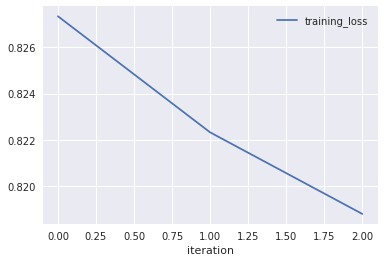

In [6]:
import google.datalab.bigquery as bq
import numpy as np
query = "SELECT iteration, loss as training_loss from ML.TRAINING_INFO(MODEL `bergqvist-sandbox.bike_demo.lr_low`)"
print query
loss_df = bq.Query(query).execute().result().to_dataframe()
loss_df['training_loss'] = np.sqrt(loss_df['training_loss'])  # mean square error to RMSE
loss_df.plot(x='iteration', y='training_loss')